In [1]:
import random
import math
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
def generateData (numberOfClassEl, numberOfClasses):
    data = []
    for classNum in range(numberOfClasses):
        centerX, centerY = random.random()*5.0, random.random()*5.0
        for rowNum in range(numberOfClassEl):
            data.append([ [random.gauss(centerX,0.5), random.gauss(centerY,0.5)], classNum])
    return data

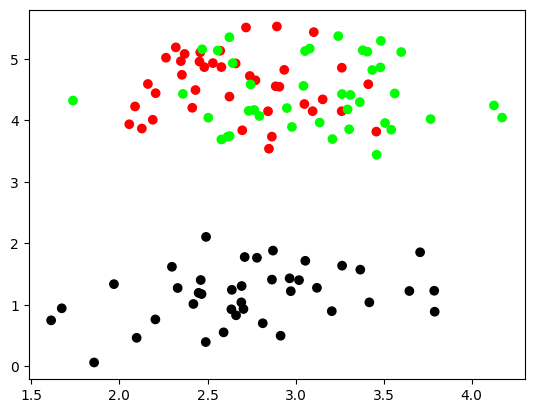

In [11]:
def showData (nClasses, nItemsInClass):
    trainData      = generateData (nItemsInClass, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#000000'])
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()   
showData (3, 40)

In [13]:
def splitTrainTest (data, testPercent):
    trainData = []
    testData  = []
    for row in data:
        if random.random() < testPercent:
            testData.append(row)
        else:
            trainData.append(row)
    return trainData, testData

In [14]:
def classifyKNN (trainData, testData, k, numberOfClasses):
    def dist (a, b):
        return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    testLabels = []	
    for testPoint in testData:
        testDist = [ [dist(testPoint, trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return testLabels

In [17]:
def calculateAccuracy (nClasses, nItemsInClass, k, testPercent):
    data = generateData (nItemsInClass, nClasses)
    trainData, testDataWithLabels = splitTrainTest (data, testPercent)
    testData = [testDataWithLabels[i][0] for i in range(len(testDataWithLabels))]
    testDataLabels = classifyKNN (trainData, testData, k, nClasses)
    print ("Accuracy: ", sum([int(testDataLabels[i]==testDataWithLabels[i][1]) for i in range(len(testDataWithLabels))]) / float(len(testDataWithLabels)))

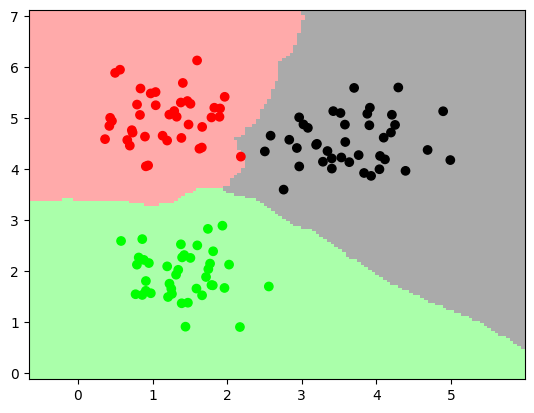

In [26]:
def showDataOnMesh (nClasses, nItemsInClass, k):
    def generateTestMesh (trainData):
        x_min = min( [trainData[i][0][0] for i in range(len(trainData))] ) - 1.0
        x_max = max( [trainData[i][0][0] for i in range(len(trainData))] ) + 1.0
        y_min = min( [trainData[i][0][1] for i in range(len(trainData))] ) - 1.0
        y_max = max( [trainData[i][0][1] for i in range(len(trainData))] ) + 1.0
        h = 0.05
        testX, testY = np.meshgrid(np.arange(x_min, x_max, h),
                                   np.arange(y_min, y_max, h))
        return [testX, testY]
    trainData      = generateData (nItemsInClass, nClasses)
    testMesh       = generateTestMesh (trainData)	
    testMeshLabels = classifyKNN (trainData, zip(testMesh[0].ravel(), testMesh[1].ravel()), k, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#000000'])
    testColormap   = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAAA'])
    pl.pcolormesh(testMesh[0],
                  testMesh[1],
                  np.asarray(testMeshLabels).reshape(testMesh[0].shape),
                  cmap=testColormap)
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()
showDataOnMesh(3, 40, 3)